In [19]:
import pandas as pd
from sklearn.metrics import confusion_matrix, RocCurveDisplay, roc_curve, auc, matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [20]:
# Read the text file into a DataFrame
df_1 = pd.read_csv('/home/adralilla/Documents/Thesis/log_group1.txt', delimiter='\t')
df_5 = pd.read_csv('/home/adralilla/Documents/Thesis/log_group_5.txt', delimiter='\t')
df_10 = pd.read_csv('/home/adralilla/Documents/Thesis/log_group_10.txt', delimiter='\t')

# Create a list of column names
column_names = ['ID', 'pred_label', 'pred_score']

# Assign the column names to the DataFrame
df_1.columns = column_names
df_5.columns = column_names
df_10.columns = column_names

df = pd.concat([df_1, df_5, df_10], ignore_index=True)

df['GT_class'] = df['ID'].str.rsplit('_', n=1).str[-1]

mapping = {'Bacteria': 0, 'Phage': 1}

# Use the map() function to assign numerical values
df['pred_class'] = df['pred_label'].map(mapping)

# Print the DataFrame
print(df)

                                                      ID pred_label  \
0      LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...      Phage   
1      LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...   Bacteria   
2      LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...   Bacteria   
3      LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...      Phage   
4      LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...      Phage   
...                                                  ...        ...   
29663  LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...      Phage   
29664  LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...   Bacteria   
29665  LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...   Bacteria   
29666  LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...      Phage   
29667  LCA_seed33_repr_k6_Pshort0_1024_s4000_k6s1_rec...   Bacteria   

       pred_score GT_class  pred_class  
0            0.77        1           1  
1            0.50        1           0  
2            0.04       

In [21]:
# True labels
true_labels = df["GT_class"].astype(int)

# Predicted labels
predicted_labels = df["pred_class"]

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
cm

array([[ 9144,  5685],
       [ 2664, 12175]])

In [22]:
mcc = matthews_corrcoef(true_labels, predicted_labels)
print(mcc)

0.44649108805655835


In [23]:
acc = accuracy_score(true_labels, predicted_labels)
print(acc)

0.7185856815424025


In [24]:
recall = recall_score(true_labels, predicted_labels, average="binary", pos_label= 1)
print(recall)

0.8204730777006537


In [25]:
f1 = f1_score(true_labels, predicted_labels, average="binary", pos_label= 1)
print(f1)

0.7446710908590478


In [26]:
prec = precision_score(true_labels, predicted_labels, average="binary", pos_label= 1)
print(prec)

0.6816909294512878


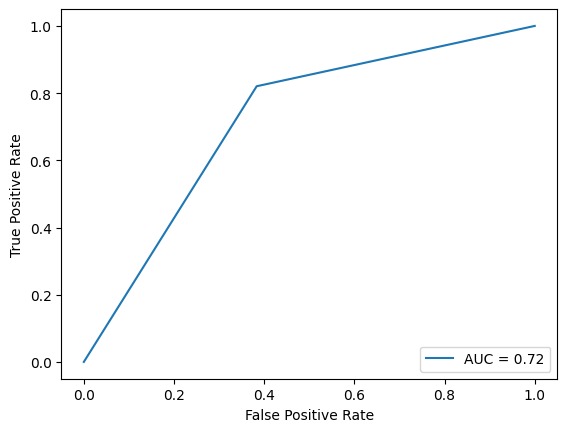

In [27]:
fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()